# Spirals data set

Add decision_surface helper function first.

In [1]:
import numpy as np

# Helper function
def decision_surface(ax, x1, x2, y, estimator):
    # Same scale for x- and y-axis
    ax.set_aspect('equal', adjustable='box')

    # Plot data points
    class1_idx = (y == 1)
    plt.scatter(x1[class1_idx], x2[class1_idx], color='C3', label='class 1', s=6)
    plt.scatter(x1[~class1_idx], x2[~class1_idx], color='C0', label='class 0', s=6)

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=500)
    y_values = np.linspace(*ylim, num=500)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.flatten(), yy.flatten()]

    # Compute predictions
    preds = estimator.predict(grid_points)
    zz = preds.reshape(xx.shape)

    # Draw decision boundary
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, alpha=0.1, cmap=plt.cm.coolwarm)
    plt.legend()
    plt.show()

Exercise - Load and plot data
---

> **Exercise**: Load the data and plot the `x1` and `x2` variables. Use one color for each class.

In [3]:
import pandas as pd
import os

data_df=pd.read_csv(os.path.join('data','spirals.csv'))

data_df.head(3)


,x1,x2,y
0,-0.952,0.721,0
1,-0.842,0.130,1
2,-0.225,0.375,1


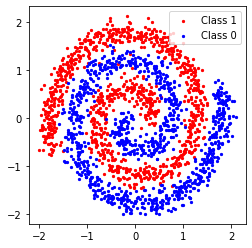

In [41]:
# Draw the x1, x2 variables using two different colors for class 0 and 1
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Build our x1, x2 and y vectors
X=scale(data_df.drop('y', axis=1).values)
x1=X[:, 0]
x2=X[:, 1]
y=data_df.y.values

# Let's get the row id's for the class 1
class1_idx = (y == 1)

# plot x1, x2 for class 0 and 1
fig, ax = plt.subplots()

plt.scatter(x1[class1_idx], x2[class1_idx], label='Class 1', s=5, c='r')
plt.scatter(x1[~class1_idx], x2[~class1_idx], label='Class 0', s=5, c='b')
ax.set_aspect('equal',  adjustable='box')


plt.legend()
plt.show()


Exercise - Compare classifiers
---

> **Exercise**: Fit the following classifiers and plot them using the `decision_surface()` function from the course.
> * Logistic regression
> * SVM with linear kernel
> * *k*-NN
> * Decision tree
> * Random forest
> * SVM with RBF kernel

Estimator: Logistic Regression


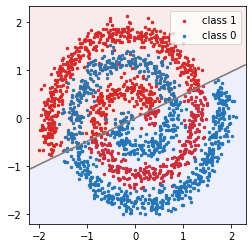

Estimator: Linear SVM


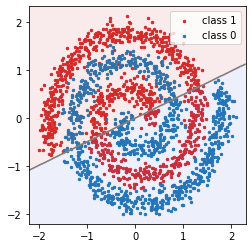

Estimator: K-NN


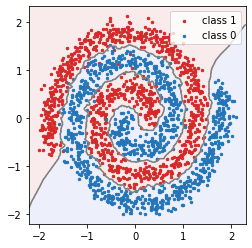

Estimator: Decision Tree


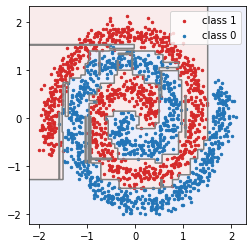

Estimator: Random Forest


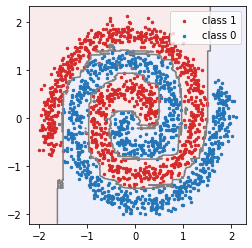

Estimator: SVM rbf


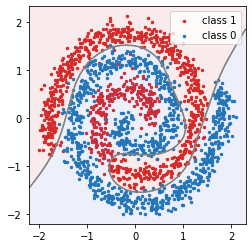

In [42]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers={
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': LinearSVC(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM rbf': SVC(kernel='rbf', C=1),
}


for name in classifiers:
    
    print("Estimator:", name)
    estimator=classifiers[name]
    
    # Fit estimator
    estimator.fit(X, y)

    # Plot decision surface
    fig, ax = plt.subplots()
    decision_surface(ax, X[:, 0], X[:, 1], y, estimator)
    ax.set_xlabel(name)

    plt.show()
    

                     